In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [2]:
# Define column names for processed.cleveland.data
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]


In [3]:
# Load the dataset with column names
df = pd.read_csv("processed.cleveland.data", names=columns)

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Replace '?' with NaN
df.replace("?", np.nan, inplace=True)
df[["ca","thal"]] = df[["ca","thal"]].apply(pd.to_numeric, errors="coerce")

# Impute missing values
imputer = SimpleImputer(strategy="median")
df[["ca","thal"]] = imputer.fit_transform(df[["ca","thal"]])

# Convert target to binary
df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=["num"], inplace=True)

# Separate numeric and categorical columns
numeric_cols = ["age","trestbps","chol","thalach","oldpeak","ca"]
categorical_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]

# Scale numeric features

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(" Final dataset shape:", df.shape)
df.head()


 Final dataset shape: (303, 19)


,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,-0.711131,0,True,False,False,False,True,False,True,False,False,True,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2.504881,1,True,False,False,True,False,False,True,True,True,False,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.432877,1,True,False,False,True,False,False,True,True,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,-0.711131,0,True,False,True,False,False,False,False,False,False,True,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,-0.711131,0,False,True,False,False,False,False,True,False,False,False,False,False


Numeric features → standardized (z-score).

Categorical features → one-hot encoded

Target → binary 0/1.

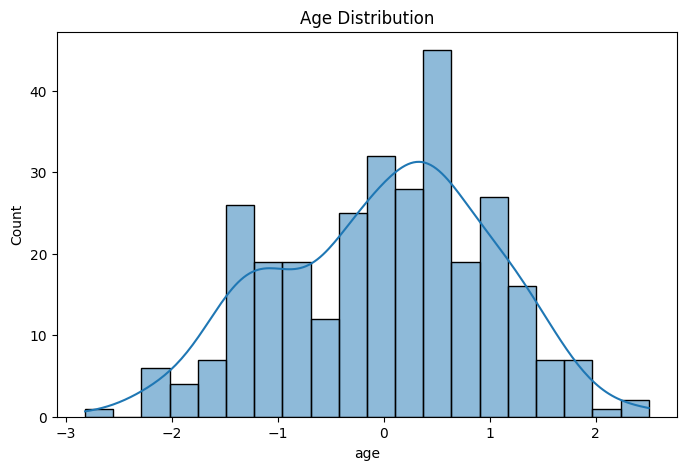

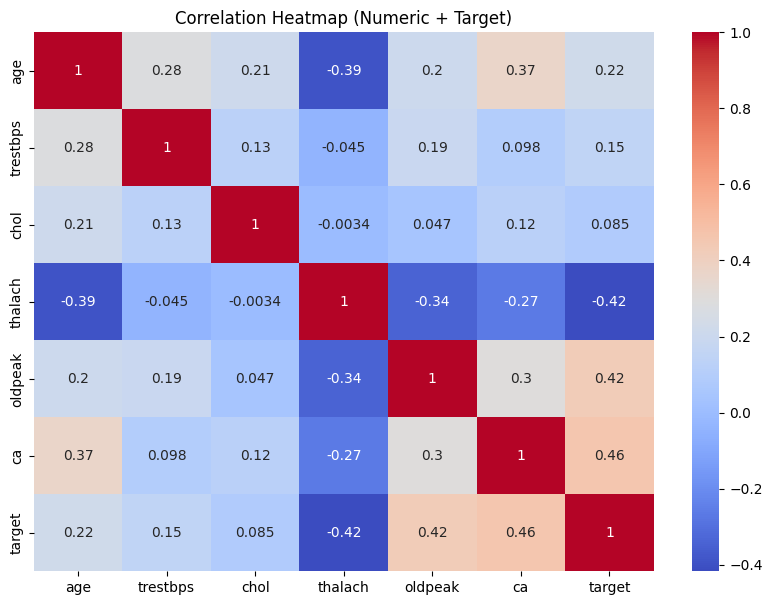

In [5]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap
# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
# plt.title("Correlation Heatmap")
# plt.show()
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols + ["target"]].corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap (Numeric + Target)")
plt.show()



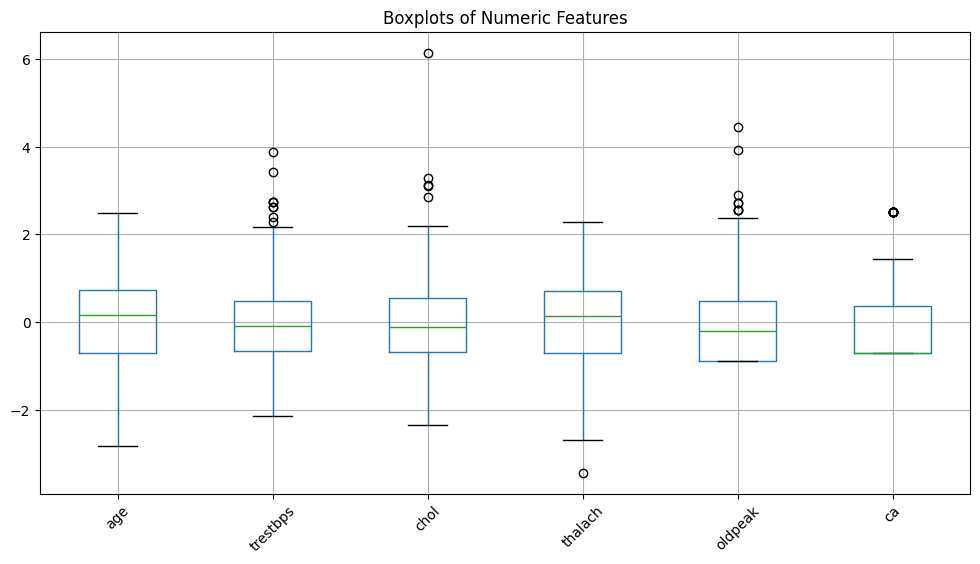

In [6]:
# Boxplots for numeric features
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)
plt.show()


#Outlier Analysis
Boxplots revealed outliers in several features (cholesterol, blood pressure, thalach, oldpeak). These outliers likely represent real medical conditions rather than data errors,patients with heart disease can have extreme values (very high cholesterol, very high resting blood pressure, etc.). so they were retained.

#Skewness in ca
The ca feature (number of major vessels) is right-skewed, with most patients having 0 vessels blocked and fewer patients having 2–4. This skewness is expected in medical populations and was not corrected.

In [7]:
df.to_csv("heart_disease_cleaned.csv", index=False)

from google.colab import files
files.download("heart_disease_cleaned.csv")

print(" Cleaned dataset saved and downloaded")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Cleaned dataset saved and downloaded
